In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

# <center> EC3389 - Week 6 - Cross-validation </center>

In [2]:
import sklearn.cross_validation as skv
import sklearn.linear_model as skl
import sklearn.neighbors as skn
import sklearn.metrics as skm

<hr>

# Generating data

<b>Exercise</b>  Create a function <font face="Courier">generate_data</font> that takes an integer <font face="Courier">n_points</font> a float $a$, and a positive float $\sigma$, and returns a tuple of three numpy arrays:

+ An array $X$ of <font face= "Courier">n_points</font> linearly spaced data on $[0,\pi]$

+ An array $y\_true_{i} = cos(a x_{i})$

+ An array $y_{i} = cos(a x_{i}) + \epsilon_{i}$ where $\epsilon_{t} \sim \mathcal{N}(0,\sigma^2)$



In [97]:
def generate_data(n_points, a = 1, sigma = .1):
    X = np.linspace(0, np.pi, n_points)
    y_true = np.cos(a*X)
    e = np.random.normal(0, sigma, n_points)
    y = y_true + e
    y.reshape(len(y), 1)
    return X, y_true, y

Then generate and plot $(X,y_{1})$ as a solid line, and $(X,y_{2})$ as a scatterplot.

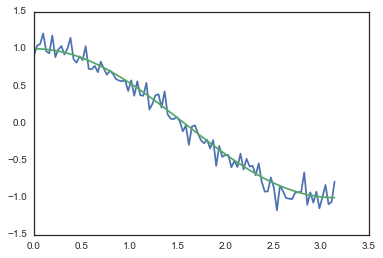

In [98]:
X, y_true, y = generate_data(100, a=1, sigma=.1)
plt.plot(X,y)
plt.plot(X,y_true)

<hr>

# Estimation using K-Nearest Neighbors

<b>Exercise</b> Estimate this model using <font face ="Courier">sklearn.neighbors.KNeighborsRegressor</font> with five neighbors. 

Use the pair <font face ="Courier">(X, y)</font> as data. 

Then print your predicted model against <font face ="Courier">y_true</font>.

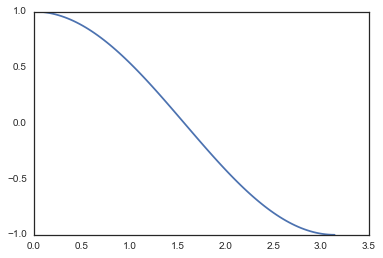

In [99]:
knn = skn.KNeighborsRegressor()

fig, ax = plt.subplots(1)
ax.plot(X, y_true)

<b>Discussion</b> 

+ What happens to the model as you change $K$, the number of neighbors? 

+ Specifically, what happens at the extremes $K \rightarrow 1$ and $K \rightarrow \infty$? 

+ How can we choose the optimal $K$?

<hr>

# K-Fold Cross-Validation

<font size = 1>Note: The "K" in "K-fold" has nothing to do with the "K" in "K-nearest neighbors" 

<b>Exercise</b> Check out the function <font face="Courier">sklearn.cross_validation.KFold</font>. What does each of its arguments do?

In [100]:
kf = skv.KFold(n = 8, n_folds = 4, shuffle = True)

In [101]:
for train_index, test_index in kf:
    print(train_index, test_index)

kf

[0 1 2 3 5 7] [4 6]
[0 2 3 4 6 7] [1 5]
[1 2 4 5 6 7] [0 3]
[0 1 3 4 5 6] [2 7]


sklearn.cross_validation.KFold(n=8, n_folds=4, shuffle=True, random_state=None)

<b>Discussion</b> 

+ Why would this be useful? Compare with just holding out a test set as we did last time.

+ Specifically, if we were to divide the data we just created, should we set <font face="Courier">shuffle</font> to  <font face="Courier">True</font> or <font face="Courier">False</font>?

<b>Exercise (1) </b> Use <font face="Courier">KFold</font> to divide your data into 3 folds. 

Train using <font face="Courier">sklearn.linear_model.KNeighborRegressor</font> on each training set. 

Each time you train the model, <font face="Courier">sklearn.metrics.mean_squared_error</font> to compute and print the $MSE$ on train and test sets.


<b>Exercise (2) </b> Redo the exercise, but now increase the number of folds. What happens to the $R^2$?

In [107]:
#n_obs = 1000



X, y_true, y = generate_data(100, a = 2, sigma = .1)

kf = skv.KFold(n = n_obs, n_folds = 3, shuffle = True)

y.reshape(100, 1)
y_true.reshape(100,1)
X.reshape(100,1)



knn = skn.KNeighborsRegressor(n_neighbors = 5) # Or any other number of neighbors
knn.fit(X,y)
preds = knn.predict(X)


plt.plot(x,preds)
for train_index, test_index in kf:
    
    # Get your train and test data for this iteration
    X_train, y_train =  X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    
    # Fit the model on training set
    knn.fit(X_train, y_train)
    # Predict on test and training set
    #yhat_test = knn.predict(X_test)
    yhat_train = knn.predict(X_test)
    
    
    # Get the MSE
    mse_test = skm.mean_squared_error(y_true = y_test , y_pred = yhat_test)
    mse_train = skm.mean_squared_error(y_true = y_train , y_pred = yhat_train)
    
    # Print it out
    print("Train MSE", mse_train, "; Test MSE", mse_test)
    


/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found arrays with inconsistent numbers of samples: [  1 100]

NameError: name 'e' is not defined

<b>Discussion</b> Many statisticians and machine learning practitioners advocate for a number of folds of the order of $K = 5$ or $K = 10$. However, the standard in econometrics is *leave-one-out* practice of $K = n$. Name some arguments for and against either of these.

<hr>

# Validation Curves

<font size = 1>Sit back and relax: I've got the rest of the code for today.

Sometimes it's useful to plot the influence of a single tuning parameter on the training score and validation scores to find out whether the estimator is overfitting or underfitting.

/Users/jamesledoux/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found arrays with inconsistent numbers of samples: [   1 1000]

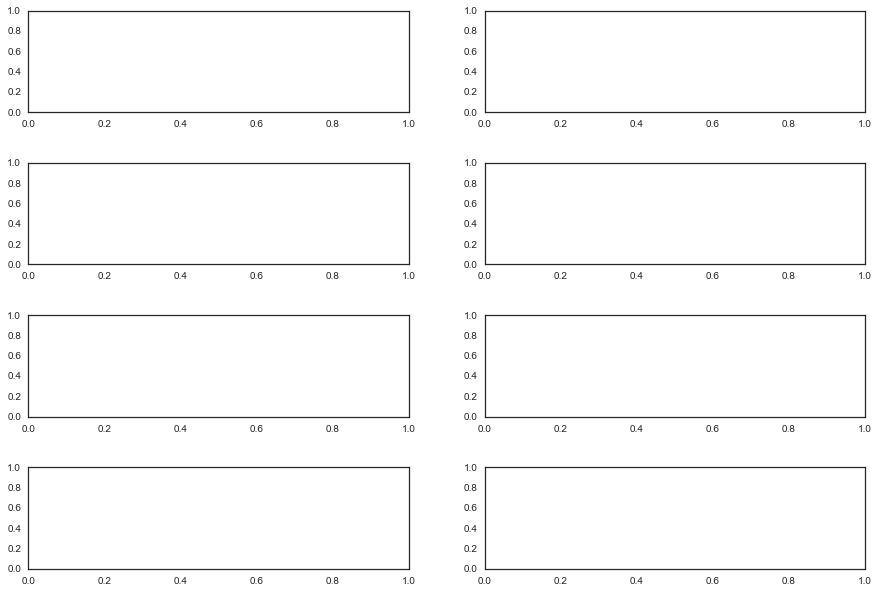

In [108]:
X, y_true, y = generate_data(1000, a = 3, sigma = 1)
n_neighbors_list = [500, 400, 300, 200, 100, 50, 25, 5]


fig, ax = plt.subplots(4, 2, figsize = (15,10))
fig.subplots_adjust(hspace = .5)

colors = plt.cm.Dark2(np.linspace(0,1, len(n_neighbors_list)))

for k, n_neighbors in enumerate(n_neighbors_list):
    
    knn = skn.KNeighborsRegressor(n_neighbors = n_neighbors)
    knn.fit(X, y)
    yhat = knn.predict(X)
    
    i,j = np.unravel_index(k, ax.shape)
    ax[i,j].plot(X, y_true, linewidth = 2, color = "black")
    ax[i,j].plot(X, yhat, linewidth = 2, color = colors[k])
    ax[i,j].set_title(label = str(n_neighbors), fontsize = 16)
    sns.despine()

<b>Discussion</b> 

+ For which values is this <i>under</i>fitting? How about <i>over</i>fitting? 

+ What is your guess for the optimal value of neighbors?

In [ ]:
X, y_true, y = generate_data(1000, a = 2, sigma = .1)

n_neighbors_list = [500, 400, 300, 200, 100, 50, 25, 5]

train_scores, test_scores = skc.validation_curve(estimator = skn.KNeighborsRegressor(),
                                                 X = X, y = y,
                                                 param_name = "n_neighbors", 
                                                 param_range = n_neighbors_list,
                                                 scoring = "mean_squared_error", 
                                                 cv = 3)

# Note the totally counter-intuitive sign flipping here!
mse_train = -train_scores
mse_test = -test_scores

fig, ax = plt.subplots(1)

# Plotting the mean of the CV-estimated MSE on test and training set
p = ax.plot(mse_test.mean(axis = 1), color = "orange", label = "test")
p = ax.plot(mse_train.mean(axis = 1), color = "blue", label = "train")


p = ax.set_xticklabels(n_neighbors_list,  size='large')
p = ax.set_xlabel("Flexibility (Number of neighbors)", fontsize = 14)
p = ax.set_title("MSE", fontsize = 16)
p = ax.legend(fontsize = 14)

<b>Discussion</b> 

+ What is contributing for the increasing in test error as the model becomes more flexible?

+ What happens if we increase the number of observations?

+ What happens if we change $a$ in <font face="Courier">generate_data</font>?

<font color = "navy"><b>Advanced</b></font> Can we improve our estimates of the MSE? Yes, using <i>bootstrapping</i>.